In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random, sqrt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np



X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape
df = pd.read_csv("data.csv",nrows=5000)

Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y[Y==10] = 0
Y.shape





scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
Xt, Xtt, Yt, Ytt = train_test_split(
      scaled_features, Y, test_size = 0.30)


def proba(labels):
    prob = [0,0,0,0,0,0,0,0,0,0]
    for i in labels:
        prob[i] += 1
    for i in range(len(prob)):
        prob[i] /= len(labels)

    return prob
def predict(x_train, y , x, k):

    point_dist = []

    for j in range(len(x_train)): 
        #calcule des disatnces
        distances = np.sum((x_train[j,:] - x)**2)
        point_dist.append(distances)
    point_dist = np.array(point_dist) 

    dist = np.argsort(point_dist)[:k] 

    labels = y[dist]
    #  retourner la probabilité du test pour X 
    return proba(labels)
def probToPred(proba):
    max = 0
    for i in range(0,len(proba)):
        if proba[i] > proba[max]:
            max = i
    return max
def svmtrain(Xt, Yt):
    #Créer le modèle
    model= svm.SVC(kernel='linear') 
    # entrainement 
    model.fit(Xt, Yt)
    return model
def knnPredict(Xt, Yt, Xtt, k):
    Ytt = np.array([probToPred(predict(Xt,Yt,x,k)) for x in Xtt])
    return Ytt
def knnPredictProba(Xt, Yt, Xtt, k):
    Ytt = np.array([predict(Xt,Yt,x,k) for x in Xtt])
    return Ytt

def knntrain(Xt, Yt,k):
    #Créer le modèle
    model= KNeighborsClassifier(n_neighbors=k) 
    # entrainement 
    model.fit(Xt, Yt)
    return model
def treetrain(Xt, Yt):
    #Créer le modèle
    model= DecisionTreeClassifier() 
    # entrainement 
    model.fit(Xt, Yt)
    return model
def mlptrain(Xt, Yt):
    #Créer le modèle
    model= MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000) 
    # entrainement 
    model.fit(Xt, Yt)
    return model
class ConfMatrix:
    def __init__(self, ypred, Ytt):
        self.matrice = np.matrix(np.zeros((10,10)))
        self.total=0
        for i in range(0, len(Ytt)):
            self.matrice[ypred[i],Ytt[i]] += 1
            self.total += 1
    def __str__(self):
        return str(self.matrice)

class Metrics:
    def __init__(self,Xt,Yt,Xtt,Ytt,k):
        self.Xt = Xt
        self.Yt = Yt
        self.Xtt = Xtt
        self.Ytt = Ytt
        self.k = k;
        self.svm = svm.SVC(kernel='linear')
        self.svm.fit(Xt,Yt)
        self.tree = DecisionTreeClassifier()
        self.tree.fit(Xt, Yt)
        self.mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
        self.mlp.fit(Xt, Yt)
    
    def matrices(self):
        self.KnnMat = ConfMatrix(knnPredict(self.Xt,self.Yt,self.Xtt,self.k), self.Ytt)
        self.SvmMat = ConfMatrix(self.svm.predict(self.Xtt), self.Ytt)
        self.TreeMat = ConfMatrix(self.tree.predict(self.Xtt), self.Ytt)
        self.MlpMat = ConfMatrix(self.mlp.predict(self.Xtt), self.Ytt)
        
    
    def TPFPTNFN(self):
        self.TP = {}
        self.FP = {}
        self.TN = {}
        self.FN = {}
        self.TP["Knn"] = [0,0,0,0,0,0,0,0,0,0]
        self.TP["SVM"] = [0,0,0,0,0,0,0,0,0,0]
        self.TP["TREE"] = [0,0,0,0,0,0,0,0,0,0]
        self.TP["MLP"] = [0,0,0,0,0,0,0,0,0,0]
        self.FP["Knn"] = [0,0,0,0,0,0,0,0,0,0]
        self.FP["SVM"] = [0,0,0,0,0,0,0,0,0,0]
        self.FP["TREE"] = [0,0,0,0,0,0,0,0,0,0]
        self.FP["MLP"] = [0,0,0,0,0,0,0,0,0,0]
        self.TN["Knn"] = [0,0,0,0,0,0,0,0,0,0]
        self.TN["SVM"] = [0,0,0,0,0,0,0,0,0,0]
        self.TN["TREE"] = [0,0,0,0,0,0,0,0,0,0]
        self.TN["MLP"] = [0,0,0,0,0,0,0,0,0,0]
        self.FN["Knn"] = [0,0,0,0,0,0,0,0,0,0]
        self.FN["SVM"] = [0,0,0,0,0,0,0,0,0,0]
        self.FN["TREE"] = [0,0,0,0,0,0,0,0,0,0]
        self.FN["MLP"] = [0,0,0,0,0,0,0,0,0,0]

        for i in range(0,10):
            self.TP["Knn"][i] += self.KnnMat.matrice[i,i]
            self.TP["SVM"][i] += self.SvmMat.matrice[i,i]
            self.TP["TREE"][i] += self.TreeMat.matrice[i,i]
            self.TP["MLP"][i] += self.MlpMat.matrice[i,i]

            self.FP["Knn"][i] += self.KnnMat.matrice[:,i].sum() - self.KnnMat.matrice[i,i]
            self.FP["SVM"][i] += self.SvmMat.matrice[:,i].sum() - self.SvmMat.matrice[i,i]
            self.FP["TREE"][i] += self.TreeMat.matrice[:,i].sum() - self.TreeMat.matrice[i,i]
            self.FP["MLP"][i] += self.MlpMat.matrice[:,i].sum() - self.MlpMat.matrice[i,i]

            self.FN["Knn"][i] += self.KnnMat.matrice[i,:].sum() - self.KnnMat.matrice[i,i]
            self.FN["SVM"][i] += self.SvmMat.matrice[i,:].sum() - self.SvmMat.matrice[i,i]
            self.FN["TREE"][i] += self.TreeMat.matrice[i,:].sum() - self.TreeMat.matrice[i,i]
            self.FN["MLP"][i] += self.MlpMat.matrice[i,:].sum() - self.MlpMat.matrice[i,i]

            self.TN["Knn"][i] += self.KnnMat.total - self.TP["Knn"][i] - self.FP["Knn"][i] - self.FN["Knn"][i]
            self.TN["SVM"][i] += self.SvmMat.total - self.TP["SVM"][i] - self.FP["SVM"][i] - self.FN["SVM"][i]
            self.TN["TREE"][i] += self.TreeMat.total - self.TP["TREE"][i] - self.FP["TREE"][i] - self.FN["TREE"][i]
            self.TN["MLP"][i] += self.MlpMat.total - self.TP["MLP"][i] - self.FP["MLP"][i] - self.FN["MLP"][i]


        print("KNN")
        print(self.TP["Knn"])
        print(self.TN["Knn"])
        print(self.FP["Knn"])
        print(self.FN["Knn"])
        print("SVM")
        print(self.TP["SVM"])
        print(self.TN["SVM"])
        print(self.FP["SVM"])
        print(self.FN["SVM"])
        print("TREE")
        print(self.TP["TREE"])
        print(self.TN["TREE"])
        print(self.FP["TREE"])
        print(self.FN["TREE"])
        print("MLP")
        print(self.TP["MLP"])
        print(self.TN["MLP"])
        print(self.FP["MLP"])
        print(self.FN["MLP"])

    def Calc(self):
        self.Rappel = {}
        self.Rappel["Knn"] = [0,0,0,0,0,0,0,0,0,0]
        self.Rappel["SVM"] = [0,0,0,0,0,0,0,0,0,0]
        self.Rappel["TREE"] = [0,0,0,0,0,0,0,0,0,0]
        self.Rappel["MLP"] = [0,0,0,0,0,0,0,0,0,0]
        self.Precision = {}
        self.Precision["Knn"] = [0,0,0,0,0,0,0,0,0,0]
        self.Precision["SVM"] = [0,0,0,0,0,0,0,0,0,0]
        self.Precision["TREE"] = [0,0,0,0,0,0,0,0,0,0]
        self.Precision["MLP"] = [0,0,0,0,0,0,0,0,0,0]
        self.TFP = {}
        self.TFP["Knn"] = [0,0,0,0,0,0,0,0,0,0]
        self.TFP["SVM"] = [0,0,0,0,0,0,0,0,0,0]
        self.TFP["TREE"] = [0,0,0,0,0,0,0,0,0,0]
        self.TFP["MLP"] = [0,0,0,0,0,0,0,0,0,0]
        self.specificité = {}
        self.specificité["Knn"] = [0,0,0,0,0,0,0,0,0,0]
        self.specificité["SVM"] = [0,0,0,0,0,0,0,0,0,0]
        self.specificité["TREE"] = [0,0,0,0,0,0,0,0,0,0]
        self.specificité["MLP"] = [0,0,0,0,0,0,0,0,0,0]

        for i in range(0,len(self.Rappel["Knn"])):
            self.Rappel["Knn"][i] = self.TP["Knn"][i] / (self.TP["Knn"][i] +  self.FN["Knn"][i])
            self.Rappel["SVM"][i] = self.TP["SVM"][i] / (self.TP["SVM"][i] +  self.FN["SVM"][i])
            self.Rappel["TREE"][i] = self.TP["TREE"][i] / (self.TP["TREE"][i] +  self.FN["TREE"][i])
            self.Rappel["MLP"][i] = self.TP["MLP"][i] / (self.TP["MLP"][i] +  self.FN["MLP"][i])

            self.Precision["Knn"][i] = self.TP["Knn"][i] / (self.TP["Knn"][i] +  self.FP["Knn"][i])
            self.Precision["SVM"][i] = self.TP["SVM"][i] / (self.TP["SVM"][i] +  self.FP["SVM"][i])
            self.Precision["TREE"][i] = self.TP["TREE"][i] / (self.TP["TREE"][i] +  self.FP["TREE"][i])
            self.Precision["MLP"][i] = self.TP["MLP"][i] / (self.TP["MLP"][i] +  self.FP["MLP"][i])

            self.specificité["Knn"][i] = self.TN["Knn"][i] / (self.TN["Knn"][i] +  self.FN["Knn"][i])
            self.specificité["SVM"][i] = self.TN["SVM"][i] / (self.TN["SVM"][i] +  self.FN["SVM"][i])
            self.specificité["TREE"][i] = self.TN["TREE"][i] / (self.TN["TREE"][i] +  self.FN["TREE"][i])
            self.specificité["MLP"][i] = self.TN["MLP"][i] / (self.TN["MLP"][i] +  self.FN["MLP"][i])

            self.TFP["Knn"][i] = self.FP["Knn"][i] / (self.FP["Knn"][i] +  self.TN["Knn"][i])
            self.TFP["SVM"][i] = self.FP["SVM"][i] / (self.FP["SVM"][i] +  self.TN["SVM"][i])
            self.TFP["TREE"][i] = self.FP["TREE"][i] / (self.FP["TREE"][i] +  self.TN["TREE"][i])
            self.TFP["MLP"][i] = self.FP["MLP"][i] / (self.FP["MLP"][i] +  self.TN["MLP"][i])

        print(self.Rappel)
        print(self.Precision)
        print(self.specificité)
        print(self.TFP)



class ConfMatrixSeuil:
    def __init__(self, ypred, Ytt, seuil):
        self.matrice = np.matrix(np.zeros((10,10)))
        self.total=0
        for i in range(0, len(Ytt)):
            for j in range(0,len(ypred[i])):
                if(ypred[i][j] > seuil):
                    self.matrice[j,Ytt[i]] += 1
                    self.total += 1
    def __str__(self):
        return str(self.matrice)

class MetricsSeuil:
    def __init__(self,Xt,Yt,Xtt,Ytt,k):
        self.Xt = Xt
        self.Yt = Yt
        self.Xtt = Xtt
        self.Ytt = Ytt
        self.k = k;
        self.svm = svm.SVC(kernel='linear',probability=True)
        self.svm.fit(Xt,Yt)
        self.tree = DecisionTreeClassifier()
        self.tree.fit(Xt, Yt)
        self.mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
        self.mlp.fit(Xt, Yt)
        self.KnnYt  = knnPredictProba(self.Xt,self.Yt,self.Xtt,self.k)
        self.SvmYt = self.svm.predict_proba(self.Xtt)
        self.TreeYt = self.tree.predict_proba(self.Xtt)
        self.MlpYt =self.mlp.predict_proba(self.Xtt)
    def matrices(self,seuil):
        self.KnnMat = ConfMatrixSeuil(self.KnnYt, self.Ytt,seuil)
        self.SvmMat = ConfMatrixSeuil(self.SvmYt, self.Ytt,seuil)
        self.TreeMat = ConfMatrixSeuil(self.TreeYt, self.Ytt,seuil)
        self.MlpMat = ConfMatrixSeuil(self.MlpYt, self.Ytt,seuil)

    def TPFPTNFN(self,i):
        TP = {}
        FP = {}
        TN = {}
        FN = {}
        TP["Knn"] = 0
        TP["SVM"] = 0
        TP["TREE"] = 0
        TP["MLP"] = 0
        FP["Knn"] = 0
        FP["SVM"] = 0
        FP["TREE"] = 0
        FP["MLP"] =0
        TN["Knn"] =0
        TN["SVM"] = 0
        TN["TREE"] =0
        TN["MLP"] = 0
        FN["Knn"] = 0
        FN["SVM"] = 0
        FN["TREE"] = 0
        FN["MLP"] = 0

        TP["Knn"] += self.KnnMat.matrice[i,i]
        TP["SVM"] += self.SvmMat.matrice[i,i]
        TP["TREE"] += self.TreeMat.matrice[i,i]
        TP["MLP"] += self.MlpMat.matrice[i,i]

        FP["Knn"] += self.KnnMat.matrice[:,i].sum() - self.KnnMat.matrice[i,i]
        FP["SVM"] += self.SvmMat.matrice[:,i].sum() - self.SvmMat.matrice[i,i]
        FP["TREE"] += self.TreeMat.matrice[:,i].sum() - self.TreeMat.matrice[i,i]
        FP["MLP"] += self.MlpMat.matrice[:,i].sum() - self.MlpMat.matrice[i,i]

        FN["Knn"] += self.KnnMat.matrice[i,:].sum() - self.KnnMat.matrice[i,i]
        FN["SVM"] += self.SvmMat.matrice[i,:].sum() - self.SvmMat.matrice[i,i]
        FN["TREE"] += self.TreeMat.matrice[i,:].sum() - self.TreeMat.matrice[i,i]
        FN["MLP"] += self.MlpMat.matrice[i,:].sum() - self.MlpMat.matrice[i,i]

        TN["Knn"] += self.KnnMat.total - TP["Knn"] - FP["Knn"] - FN["Knn"]
        TN["SVM"] += self.SvmMat.total - TP["SVM"] - FP["SVM"] - FN["SVM"]
        TN["TREE"] += self.TreeMat.total - TP["TREE"]- FP["TREE"]- FN["TREE"]
        TN["MLP"] += self.MlpMat.total - TP["MLP"] - FP["MLP"] - FN["MLP"]

        return TP,FP,TN,FN





    

In [6]:
TPRtable = {"Knn":[],"SVM":[],"TREE":[],"MLP":[]}
FPRtable = {"Knn":[],"SVM":[],"TREE":[],"MLP":[]}
max = 1000
MetricsS = MetricsSeuil(Xt,Yt,Xtt,Ytt,5)

In [27]:

TPRtable = {0:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},1:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},2:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},3:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},4:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},5:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},6:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},7:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},8:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},9:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]}}
FPRtable = {0:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},1:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},2:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},3:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},4:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},5:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},6:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},7:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},8:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]},9:{"Knn":[],"SVM":[],"TREE":[],"MLP":[]}}
max = 10000
for i in range(1,max):

    MetricsS.matrices(i/max)
    for j in range(0,10):
        TP,FP,TN,FN = MetricsS.TPFPTNFN(j)
        TPRtable[j]["Knn"].append(TP["Knn"]/(TP["Knn"] + FN["Knn"]))
        TPRtable[j]["SVM"].append(TP["SVM"]/(TP["SVM"] + FN["SVM"]))
        TPRtable[j]["TREE"].append(TP["TREE"]/(TP["TREE"] + FN["TREE"]))
        TPRtable[j]["MLP"].append(TP["MLP"]/(TP["MLP"] + FN["MLP"]))
        FPRtable[j]["Knn"].append(FP["Knn"]/(FP["Knn"] + TN["Knn"]))
        FPRtable[j]["SVM"].append(FP["SVM"]/(FP["SVM"] + TN["SVM"]))
        FPRtable[j]["TREE"].append(FP["TREE"]/(FP["TREE"] + TN["TREE"]))
        FPRtable[j]["MLP"].append(FP["MLP"]/ (FP["MLP"]+ TN["MLP"]))
    


C:\Users\Mekki\AppData\Local\Temp\ipykernel_11292\3939402191.py:10: RuntimeWarning: invalid value encountered in double_scalars
  TPRtable[j]["SVM"].append(TP["SVM"]/(TP["SVM"] + FN["SVM"]))
C:\Users\Mekki\AppData\Local\Temp\ipykernel_11292\3939402191.py:12: RuntimeWarning: invalid value encountered in double_scalars
  TPRtable[j]["MLP"].append(TP["MLP"]/(TP["MLP"] + FN["MLP"]))


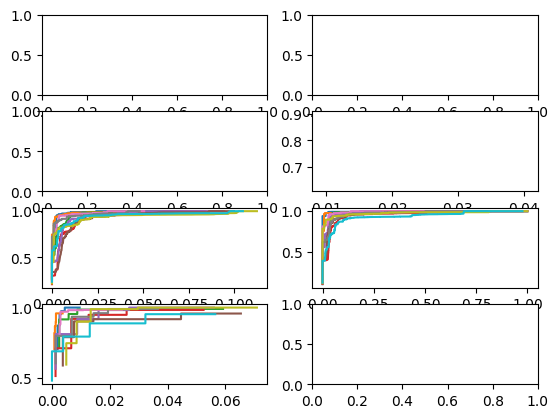

In [44]:
fig,axis  = plt.subplots(4,2)
for j in range(0,10):
    
    TPRtable[j]["SVM"].sort()
    FPRtable[j]["SVM"].sort()
    axis[2,1].plot(FPRtable[j]["SVM"],TPRtable[j]["SVM"])
    TPRtable[j]["Knn"].sort()
    FPRtable[j]["Knn"].sort()
    axis[3,0].plot(FPRtable[j]["Knn"],TPRtable[j]["Knn"])
    TPRtable[j]["MLP"].sort()
    FPRtable[j]["MLP"].sort()
    axis[2,0].plot(FPRtable[j]["MLP"],TPRtable[j]["MLP"])
    TPRtable[j]["TREE"].sort()
    FPRtable[j]["TREE"].sort()
    axis[1,1].plot(FPRtable[j]["TREE"],TPRtable[j]["TREE"])
    
    